In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et


sns.set(font_scale=1.5, style="whitegrid")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [2]:
lidar_dem_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "pre-flood", "lidar", "pre_DTM.tif")

lidar_dem_xr = rxr.open_rasterio(lidar_dem_path, masked=True).squeeze()
lidar_dem_xr

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [3]:
lidar_dsm_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "pre-flood", "lidar", "pre_DSM.tif")

lidar_dsm_xr = rxr.open_rasterio(lidar_dsm_path, masked=True).squeeze()

lidar_dsm_xr

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [4]:
lidar_dem_xr.rio.bounds() == lidar_dsm_xr.rio.bounds()

True

In [5]:
lidar_dem_xr.rio.resolution() == lidar_dsm_xr.rio.resolution()

True

In [6]:
lidar_chm_xr = lidar_dsm_xr - lidar_dem_xr 

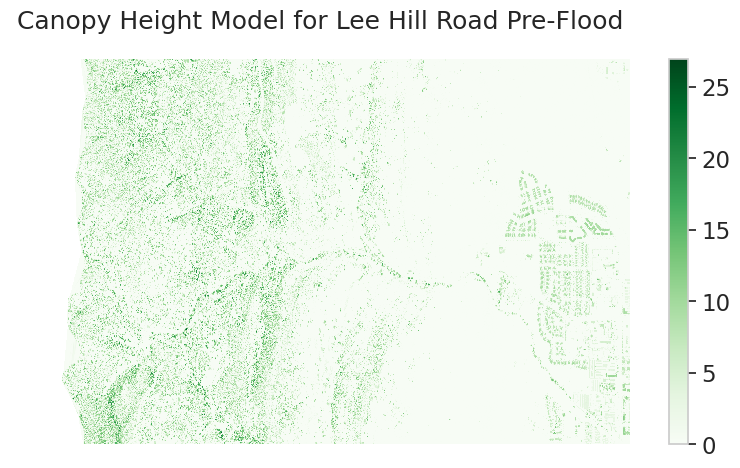

In [7]:
f, ax = plt.subplots(figsize=(10,5))

lidar_chm_xr.plot(cmap="Greens")
ax.set(title="Canopy Height Model for Lee Hill Road Pre-Flood")
ax.set_axis_off()
plt.show()

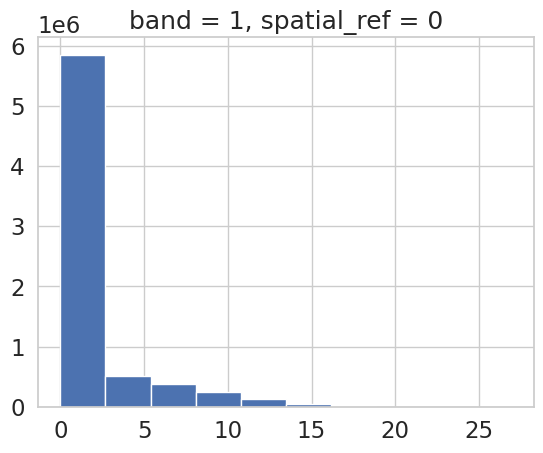

In [8]:
lidar_chm_xr.plot.hist()
plt.show()

In [9]:
np.nanmin(lidar_chm_xr)

0.0

In [10]:

np.nanmax(lidar_chm_xr)

26.930054

In [11]:
data_path = os.path.join("colorado-flood", "spatial", "outputs")

if os.path.exists(data_path):
    print("exists")
else:
    os.makedirs(data_path)

exists


In [12]:
lidar_chm_xr.rio.crs

CRS.from_epsg(32613)

In [13]:

lidar_chm_xr.rio.nodata

In [14]:
pre_chm_data_path = os.path.join(data_path, "pre-flood-chm.tif")
pre_chm_data_path

'colorado-flood/spatial/outputs/pre-flood-chm.tif'

In [15]:
lidar_chm_xr.rio.to_raster(pre_chm_data_path)

In [16]:
lidar_chm_data = rxr.open_rasterio(pre_chm_data_path, masked=True).squeeze()
lidar_chm_data

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0